This Kaggle dataset is about customer conversion on Google's Google Merchandise Store (also known as GStore, where Google swag is sold). The main purpose of this analysis is to predict revenue per customer and make recommandations on promotional strategies. The main technical challenge it poses to predicting revenue is the presence of multiple high cardinality categorical features. By careful data exploration followed by well-thought choice of feature treatments as well as machine learning algorithm, I show that an optimal solution based on feature-engineering and extreme gradient-boosted decision trees yields an enhanced predictive power of 0.997, as measured by the area under the precision-recall curve. Crucially, these results were obtained without artificial balancing of the data making this approach suitable to real-world applications.

<a id='top'></a>
#### Outline: 
#### 0. <a href='#Sampling'>Random sampling of training set</a>


#### 1. <a href='#clean'>Data Cleaning</a>
11. <a href='#cleanID'>Cleaning of IDs</a>
12. <a href='#cleanTotals'>Cleaning of Variable Totals</a>
13. <a href='#cleanTS'>Cleaning of Time Series Variables</a>
14. <a href='#cleanLoc'>Cleaning of Location Variables</a>
15. <a href='#cleanDev'>Cleaning of Device Variables</a>
16. <a href='#cleanCust'>Cleaning of Custom Dimension Variables</a>


#### 2. <a href='#feature-eng'>Feature Engineering</a>
21. <a href='#dropUnif'> Drop uninformative categorical varibles</a>
22. <a href='#dropMissing'>Drop variables with too many missing values</a>
23. <a href='#encodeCat'>Encode Categorical Variables</a>
24. <a href='#encodeCat1'>Encode Network Domain</a>
25. <a href='#encodeCat2'>Encode Operating Systems</a>

#### 3. <a href='#EDA'>Exploratory Data Analysis</a>

#### 4. <a href='#ML'>Machine Learning to Predict Transactions</a>
41. <a href='#rfEnum'>Random Forest with Enum Encoding</a>
42. <a href='#gbmEnum'>GBM with Enum Encoding</a>
43. <a href='#gbmTarget'>GBM with sort_by_response Encoding</a>
44. <a href='#gbmTargetDev'>GBM with Target Encoding Channel/Device Analysis</a>


#### 5. <a href='#visualization'>Visualization</a>
51. <a href='#varimp'>Variable Importance Plot</a>
52. <a href='#pdp'>Partial Dependency Plot</a>
53. <a href='#pdp2dim'>Two Variable Partial Dependency Plot</a>
54. <a href='#Treeplot'>Major Decision Trees Plot</a>

#### 6. <a href='#Out-Of-Sample Walk Forward Testing'>Out-Of-Sample Walk Forward Testing</a>


#### 7. <a href='#conclusion'>Conclusion</a>

<a id='visualization'></a>
# 5. Visualization
<a href='#top'>back to top</a>

<a id='varimp'></a>
### 5.1 Variable Importance Plot
<a href='#top'>back to top</a>

##### Mac OS
path=""
mojo_file_name = 'gbm2.zip'
modelfile = gbm2.download_mojo(mojo_file_name,get_genmodel_jar=False)
print("Model saved to " + modelfile)

In [42]:
path = 'C://Users//XuL//Desktop//kaggle'
mojo_file_name = '//model//gbm0.zip'
modelfile = gbm0.download_mojo(path+mojo_file_name,get_genmodel_jar=False)
print("Model saved to " + modelfile)

Model saved to C:\Users\XuL\Desktop\kaggle\model\gbm0.zip


<a id='pdp'></a>
### 5.2 Partial Dependency Plot
<a href='#top'>back to top</a>

In [167]:
def lineplot_ci(pdp,x_name,ttl,cat_type,figsize=[10,6],**kwargs):
    
    if cat_type=='int':
        pdp[x_name] = pdp[x_name].map(lambda x: int(x))
    elif cat_type=='float':
        pdp[x_name] = pdp[x_name].map(lambda x: float(x))
        
    pdp.sort_values(by=x_name,ascending=True,inplace=True)

    pdp['95%CI_lower'] = pdp['mean_response']-pdp['std_error_mean_response']*0.95
    pdp['95%CI_higher'] = pdp['mean_response']+pdp['std_error_mean_response']*0.95

    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(pdp[x_name],pdp['mean_response'],label='mean')
    ax.fill_between(pdp[x_name], pdp['95%CI_lower'],  \
                    pdp['95%CI_higher'], color='b', alpha=.1, label="95% CI")

    ax.scatter(pdp[x_name],pdp['mean_response'],color='r')
    ax.set_xticks(pdp[x_name])
    
    if not kwargs == None:
        if 'rotation' in kwargs.keys():
            ax.set_xticklabels(labels=pdp[x_name], rotation=kwargs['rotation'],ha="right")
           
    ax.legend(loc=0)
    ax.set_xlabel(ttl)
    ax.grid(True,linestyle='--')
    ax.set_title(ttl+" Partial Dependency Plot")
    plt.savefig(ttl+'_pdp.png')
    return pdp

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


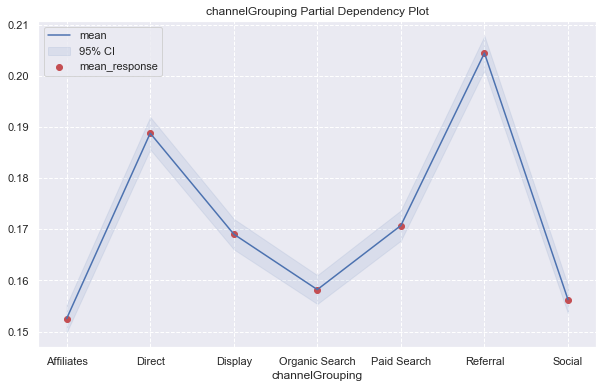

In [45]:
pdp = gbm0.partial_plot(train.rbind(valid),["channelGrouping"])
pdp = pdp[0].as_data_frame()
plt.close()
pdp_cg = lineplot_ci(pdp,"channelgrouping","channelGrouping",'str')

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


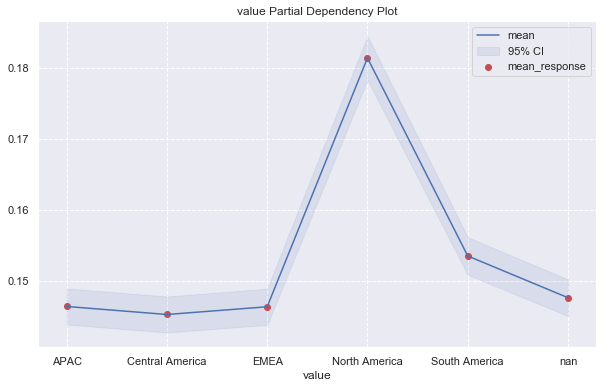

In [168]:
pdp = gbm0.partial_plot(train.rbind(valid),["value"])
pdp = pdp[0].as_data_frame()
plt.close()
pdp = lineplot_ci(pdp,"value".lower(),"value",'str')

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


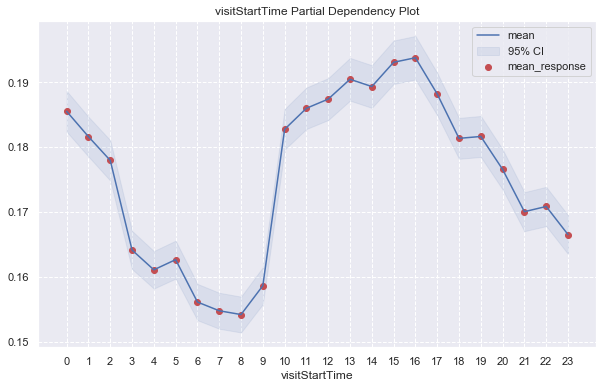

In [47]:
pdp = gbm0.partial_plot(train.rbind(valid),["visitStartTime"],nbins=24)
pdp = pdp[0].as_data_frame()
plt.close()
pdp = lineplot_ci(pdp,"visitStartTime".lower(),"visitStartTime",'int')

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


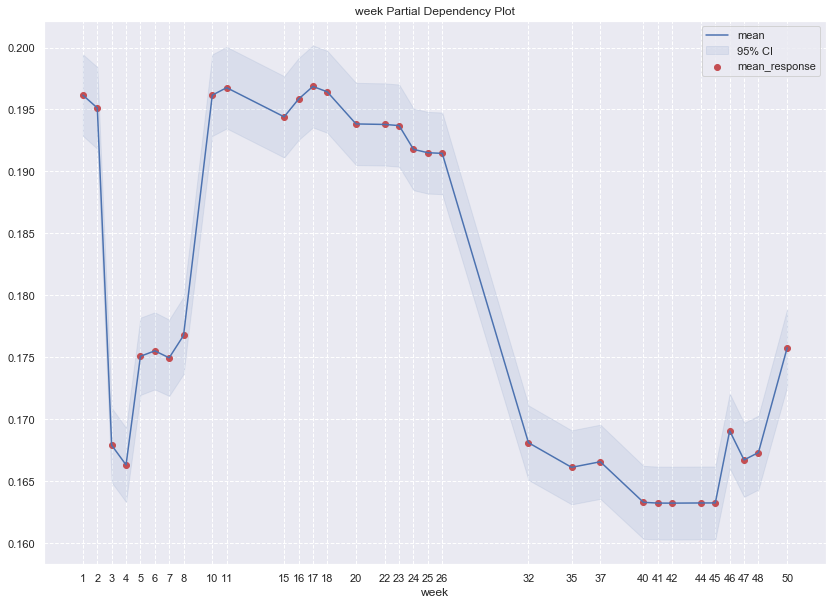

In [48]:
pdp = gbm0.partial_plot(train.rbind(valid),["week"],nbins=52)
pdp = pdp[0].as_data_frame()
plt.close()
pdp = lineplot_ci(pdp,"week","week",'int',figsize=[14,10])

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


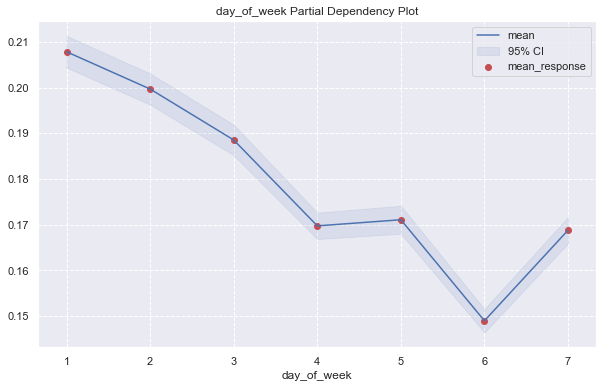

In [49]:
pdp = gbm0.partial_plot(train.rbind(valid),["day_of_week"],nbins=7)
pdp = pdp[0].as_data_frame()
plt.close()
pdp = lineplot_ci(pdp,"day_of_week","day_of_week",'int')

In [76]:
pdp = gbm0.partial_plot(train.rbind(valid),["operatingSystem"],nbins=7,
                       user_splits={"operatingSystem":list(operatingSystem_dict.keys())})
pdp = pdp[0].as_data_frame()
plt.close()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


In [77]:
pdp['name'] = pdp['operatingsystem'].map(lambda x: " ".join(operatingSystem_dict[x]))

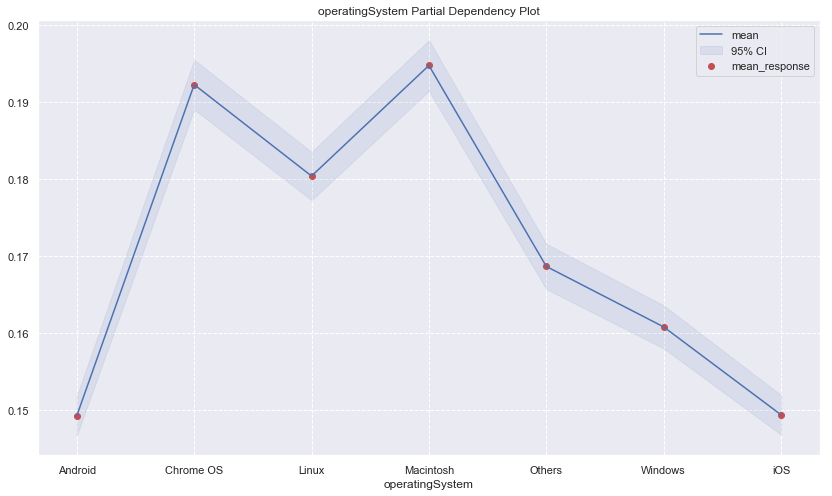

In [79]:
pdp = lineplot_ci(pdp,"name","operatingSystem",'str',[14,8])

In [80]:
pdp = gbm0.partial_plot(train.rbind(valid),["deviceCategory"],nbins=7)
pdp = pdp[0].as_data_frame()
plt.close()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


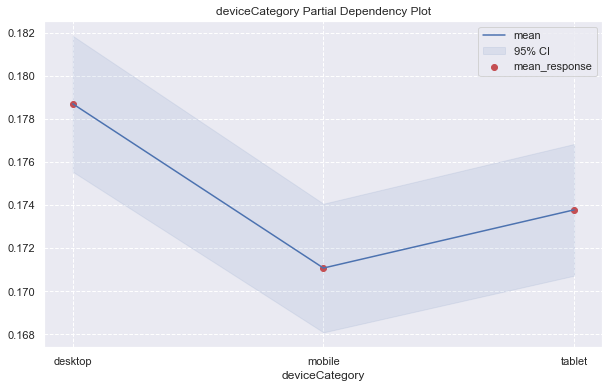

In [81]:
pdp = lineplot_ci(pdp,"devicecategory","deviceCategory",'str')

In [82]:
pdp = gbm0.partial_plot(train.rbind(valid),["networkDomain"],nbins=14,
                        user_splits={"networkDomain":list(networkDomain_dict.keys())})
pdp = pdp[0].as_data_frame()
plt.close()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


In [83]:
pdp['name'] = pdp['networkdomain'].map(lambda x: " ".join(networkDomain_dict[x]))

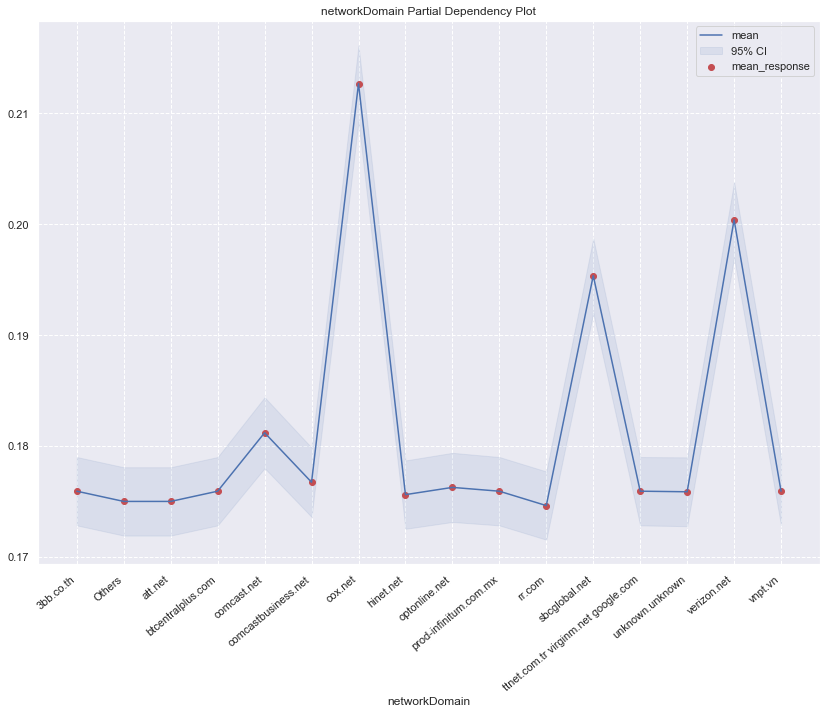

In [84]:
pdp = lineplot_ci(pdp,"name","networkDomain","str",figsize=[14,10],rotation=40)

In [85]:
pdp = gbm0.partial_plot(train.rbind(valid),["city"],nbins=14,
                        user_splits={"city":list(city_dict.keys())})
pdp = pdp[0].as_data_frame()
plt.close()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


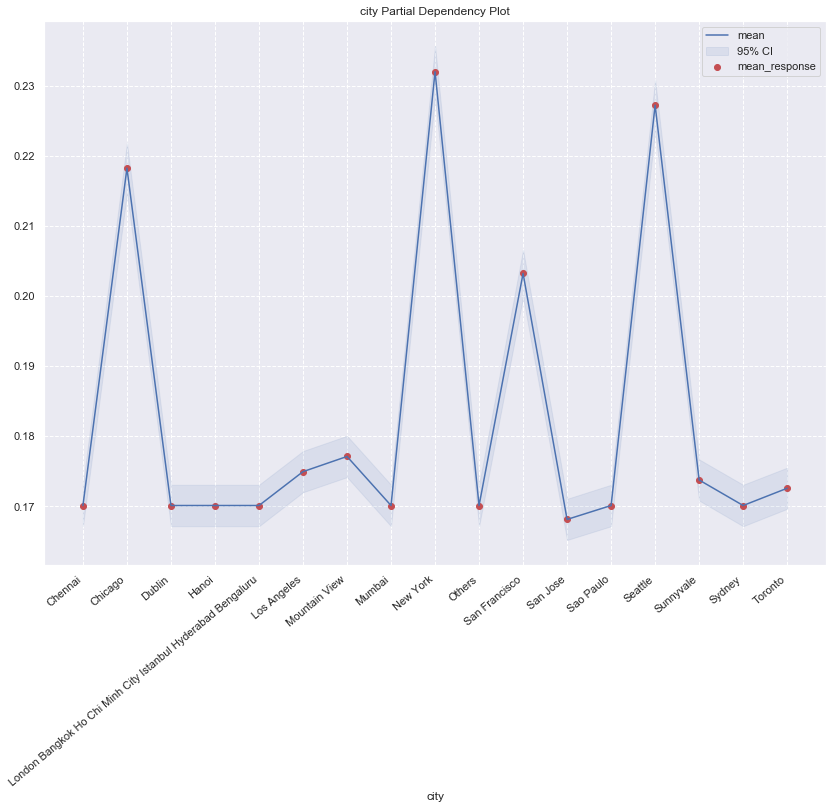

In [86]:
pdp['name'] = pdp['city'].map(lambda x: " ".join(city_dict[x]))
pdp = lineplot_ci(pdp,"name","city","str",figsize=[14,10],rotation=40)

In [87]:
pdp = gbm0.partial_plot(train.rbind(valid),["region"],nbins=14,
                        user_splits={"region":list(region_dict.keys())})
pdp = pdp[0].as_data_frame()
plt.close()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


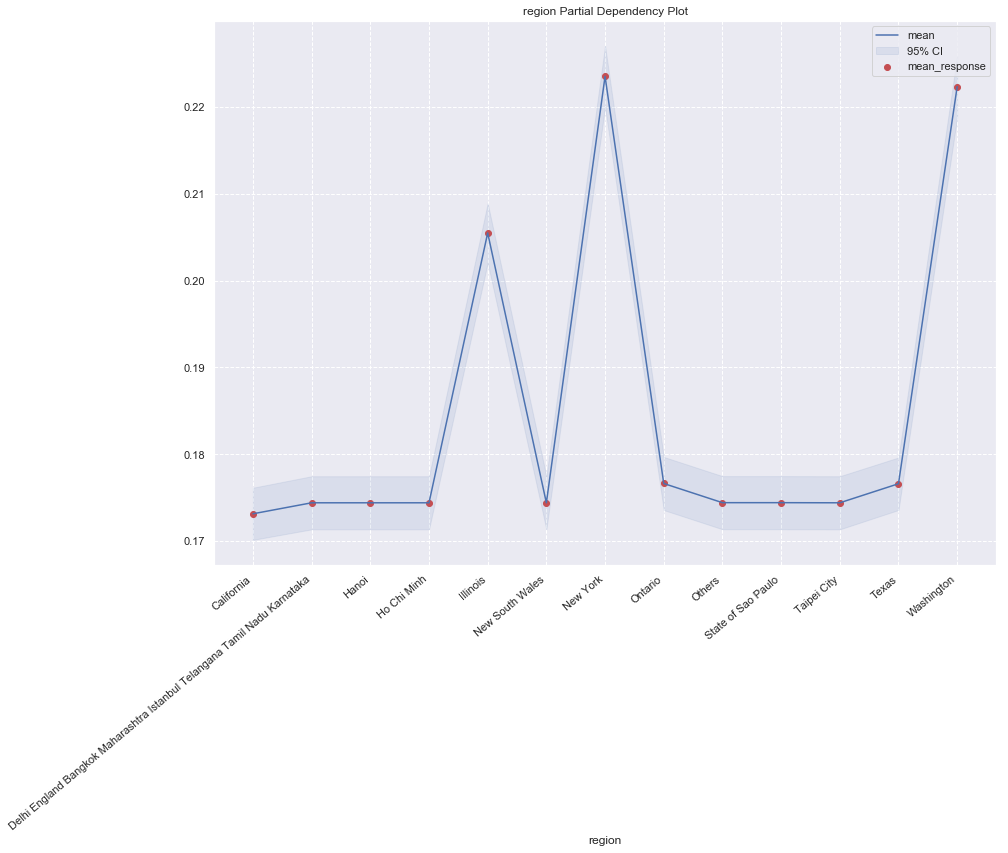

In [88]:
pdp['name'] = pdp['region'].map(lambda x: " ".join(region_dict[x]))
pdp = lineplot_ci(pdp,"name","region","str",figsize=[14,10],rotation=40)

In [89]:
pdp = gbm0.partial_plot(train.rbind(valid),["country"],nbins=14,
                        user_splits={"country":list(country_dict.keys())})
pdp = pdp[0].as_data_frame()
plt.close()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


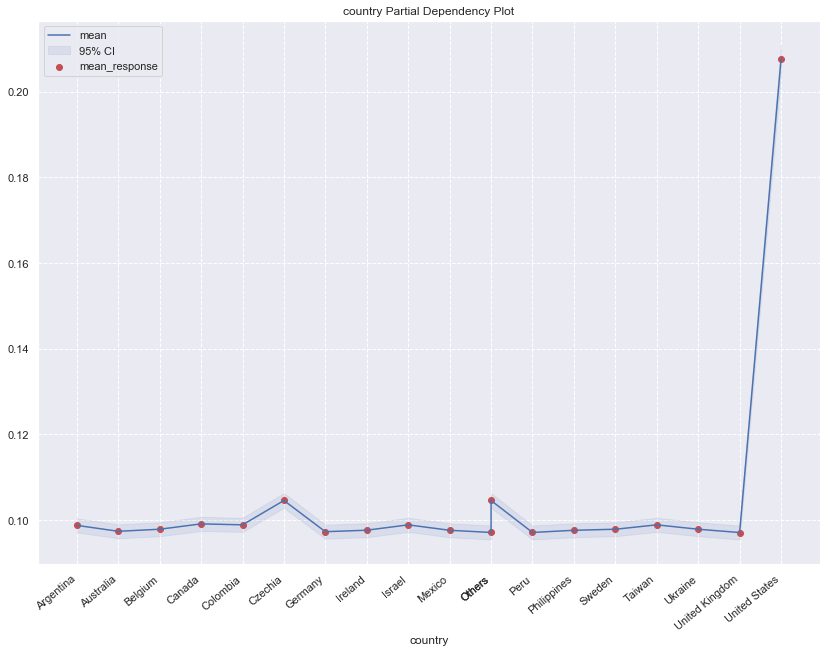

In [90]:
pdp['name'] = pdp['country'].map(lambda x: " ".join(country_dict[x]))
pdp = lineplot_ci(pdp,"name","country","str",figsize=[14,10],rotation=40)

In [91]:
pdp = gbm0.partial_plot(train.rbind(valid),["browser"],nbins=14,
                        user_splits={"browser":list(browser_dict.keys())})
pdp = pdp[0].as_data_frame()
plt.close()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


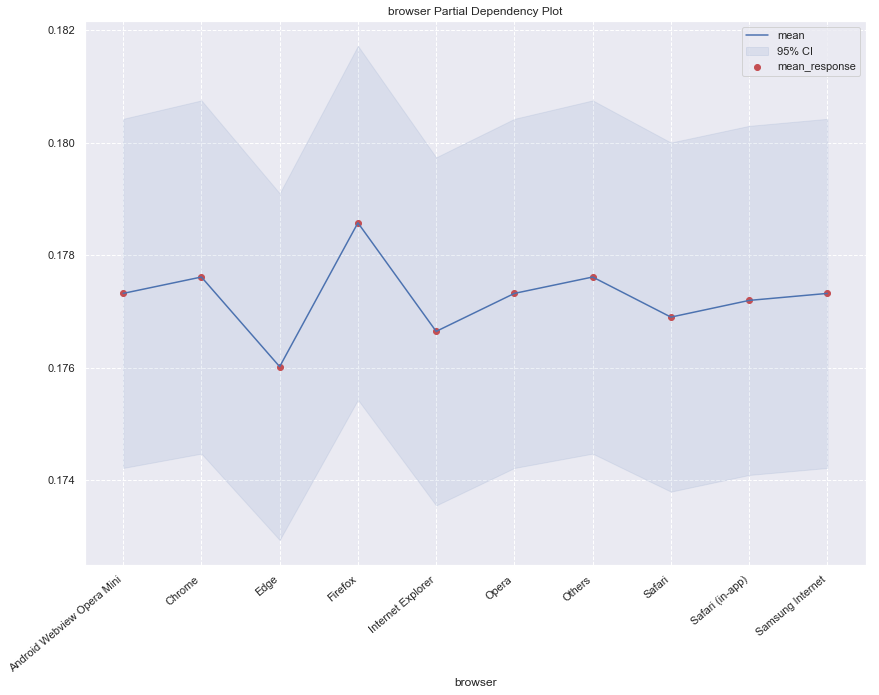

In [92]:
pdp['name'] = pdp['browser'].map(lambda x: " ".join(browser_dict[x]))
pdp = lineplot_ci(pdp,"name","browser","str",figsize=[14,10],rotation=40)

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


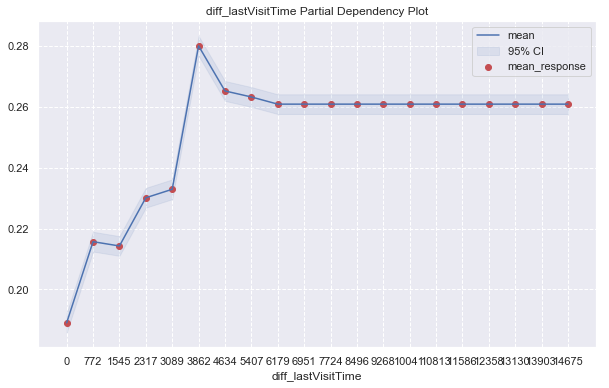

In [169]:
pdp = gbm0.partial_plot(train.rbind(valid),["diff_lastVisitTime"])
pdp = pdp[0].as_data_frame()
plt.close()
pdp = lineplot_ci(pdp,"diff_lastvisittime","diff_lastVisitTime",'float')

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


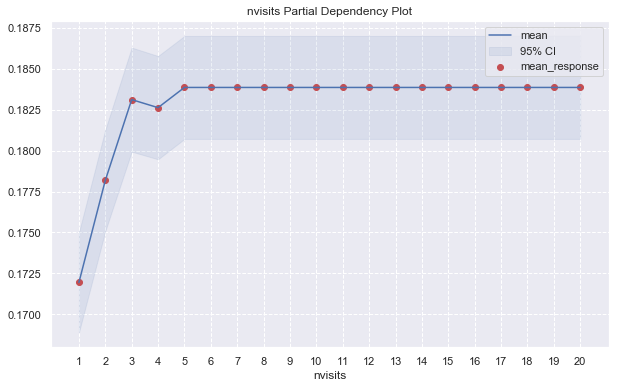

In [170]:
pdp = gbm0.partial_plot(train.rbind(valid),["nvisits"])
pdp = pdp[0].as_data_frame()
plt.close()
pdp = lineplot_ci(pdp,"nvisits","nvisits",'int')

<a id='pdp2dim'></a>
### 5.3 Two Variable Partial Dependency Plot
<a href='#top'>back to top</a>

In [ ]:
from pdpbox import pdp, get_dataset, info_plots

In [ ]:
pdp_day_of_week = pdp.pdp_isolate(
    model=gbm2, dataset=train.rbind(valid), model_features=names_x_sub, feature='day_of_week'
)
fig, axes = pdp.pdp_plot(pdp_day_of_week, 'day_of_week', plot_lines=True, frac_to_plot=100)

<a id='Treeplot'></a>
### 5.4 Major Decision Trees Plot
<a href='#top'>back to top</a>

##### mac os
h2o_jar_path= '../../../h2o/h2o.jar'
gv_file_path = "graph/my_gbm_graph"
image_file_path = "image/my_gbm_tree"

In [87]:
h2o_jar_path= 'H://h2o.jar'
gv_file_path = ".//graph//my_gbm_graph"
image_file_path = ".//image//my_gbm_tree"

In [88]:
def generateTree(h2o_jar_path, mojo_file_path, gv_file_path, path, tree_id = 0):

    gv_file_path = path + gv_file_path + "_" + str(tree_id) + ".gv"
    mojo_file_path = path + mojo_file_path
    
    cmd = ["java", "-cp", h2o_jar_path, \
    "hex.genmodel.tools.PrintMojo", "--tree", str(tree_id), \
    "-i", mojo_file_path , "-o", gv_file_path ]
    
    result = subprocess.call(cmd, shell=False)
    print(" ".join(cmd))
    
    if result is 0:
        print("Success: Graphviz file " + gv_file_path + " is generated.")
    else: 
        print("Error: Graphviz file " + gv_file_path + " could not be generated.")

In [89]:
def generateTreeImage(gv_file_path, image_file_path, path, tree_id):
    
    image_file_path = path + image_file_path + "_" + str(tree_id) + ".png"
    gv_file_path = path + gv_file_path + "_" + str(tree_id) + ".gv"
    
    cmd = ["C:\\Users\\XuL\\Downloads\\graphviz-2.38\\release\\bin\\dot", \
                    "-Tpng", gv_file_path, "-o", image_file_path]
    print(" ".join(cmd))
   
    result = subprocess.call(cmd, shell=False)

    if result is 0:
        print("Success: Image File " + image_file_path + " is generated.")
        print("Now you can execute the follow line as-it-is to see the tree graph:") 
        print("Image(filename='" + image_file_path + "\')")
    else:
        print("Error: Image file " + image_file_path + " could not be generated.")

In [90]:
generateTree(h2o_jar_path,mojo_file_name,gv_file_path,path,0)

java -cp H://h2o.jar hex.genmodel.tools.PrintMojo --tree 0 -i C://Users//XuL//Desktop//kaggle//model//gbm0.zip -o C://Users//XuL//Desktop//kaggle.//graph//my_gbm_graph_0.gv
Success: Graphviz file C://Users//XuL//Desktop//kaggle.//graph//my_gbm_graph_0.gv is generated.


In [91]:
generateTreeImage(gv_file_path, image_file_path, path, 0)

C:\Users\XuL\Downloads\graphviz-2.38\release\bin\dot -Tpng C://Users//XuL//Desktop//kaggle.//graph//my_gbm_graph_0.gv -o C://Users//XuL//Desktop//kaggle.//image//my_gbm_tree_0.png
Success: Image File C://Users//XuL//Desktop//kaggle.//image//my_gbm_tree_0.png is generated.
Now you can execute the follow line as-it-is to see the tree graph:
Image(filename='C://Users//XuL//Desktop//kaggle.//image//my_gbm_tree_0.png')


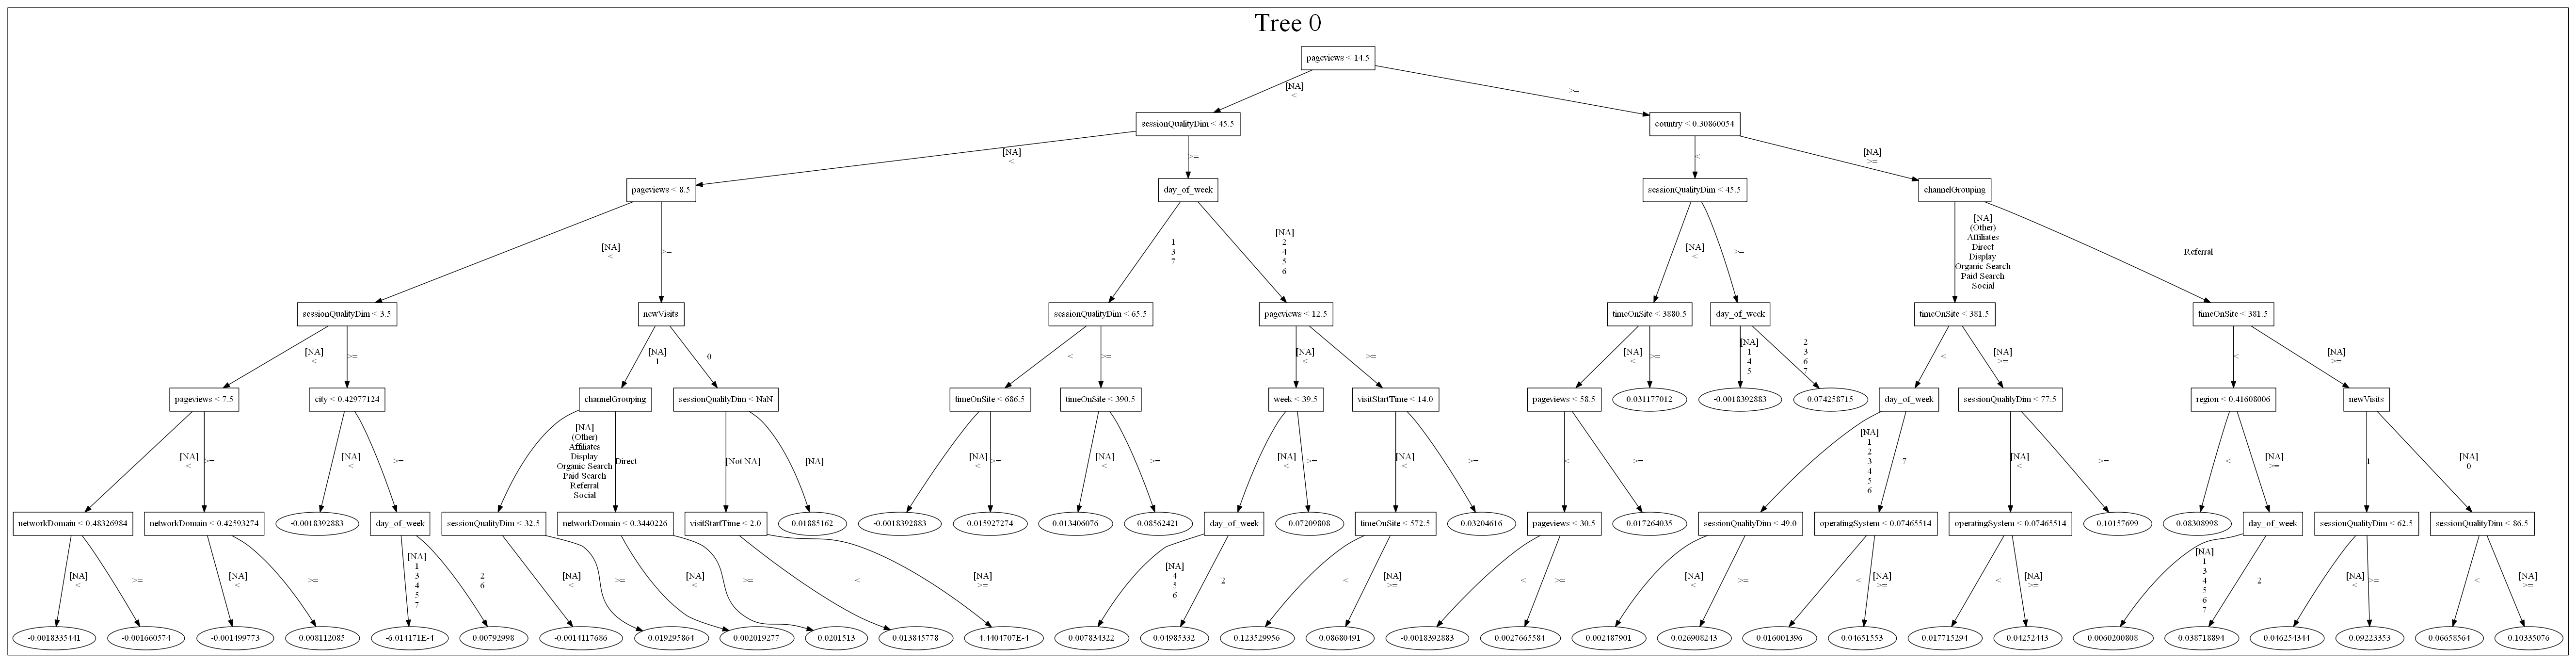

In [92]:
Image(filename=path+image_file_path+'_0.png')

In [93]:
generateTree(h2o_jar_path,mojo_file_name,gv_file_path,path,1)

java -cp H://h2o.jar hex.genmodel.tools.PrintMojo --tree 1 -i C://Users//XuL//Desktop//kaggle//model//gbm0.zip -o C://Users//XuL//Desktop//kaggle.//graph//my_gbm_graph_1.gv
Success: Graphviz file C://Users//XuL//Desktop//kaggle.//graph//my_gbm_graph_1.gv is generated.


In [94]:
generateTreeImage(gv_file_path, image_file_path, path, 1)

C:\Users\XuL\Downloads\graphviz-2.38\release\bin\dot -Tpng C://Users//XuL//Desktop//kaggle.//graph//my_gbm_graph_1.gv -o C://Users//XuL//Desktop//kaggle.//image//my_gbm_tree_1.png
Success: Image File C://Users//XuL//Desktop//kaggle.//image//my_gbm_tree_1.png is generated.
Now you can execute the follow line as-it-is to see the tree graph:
Image(filename='C://Users//XuL//Desktop//kaggle.//image//my_gbm_tree_1.png')


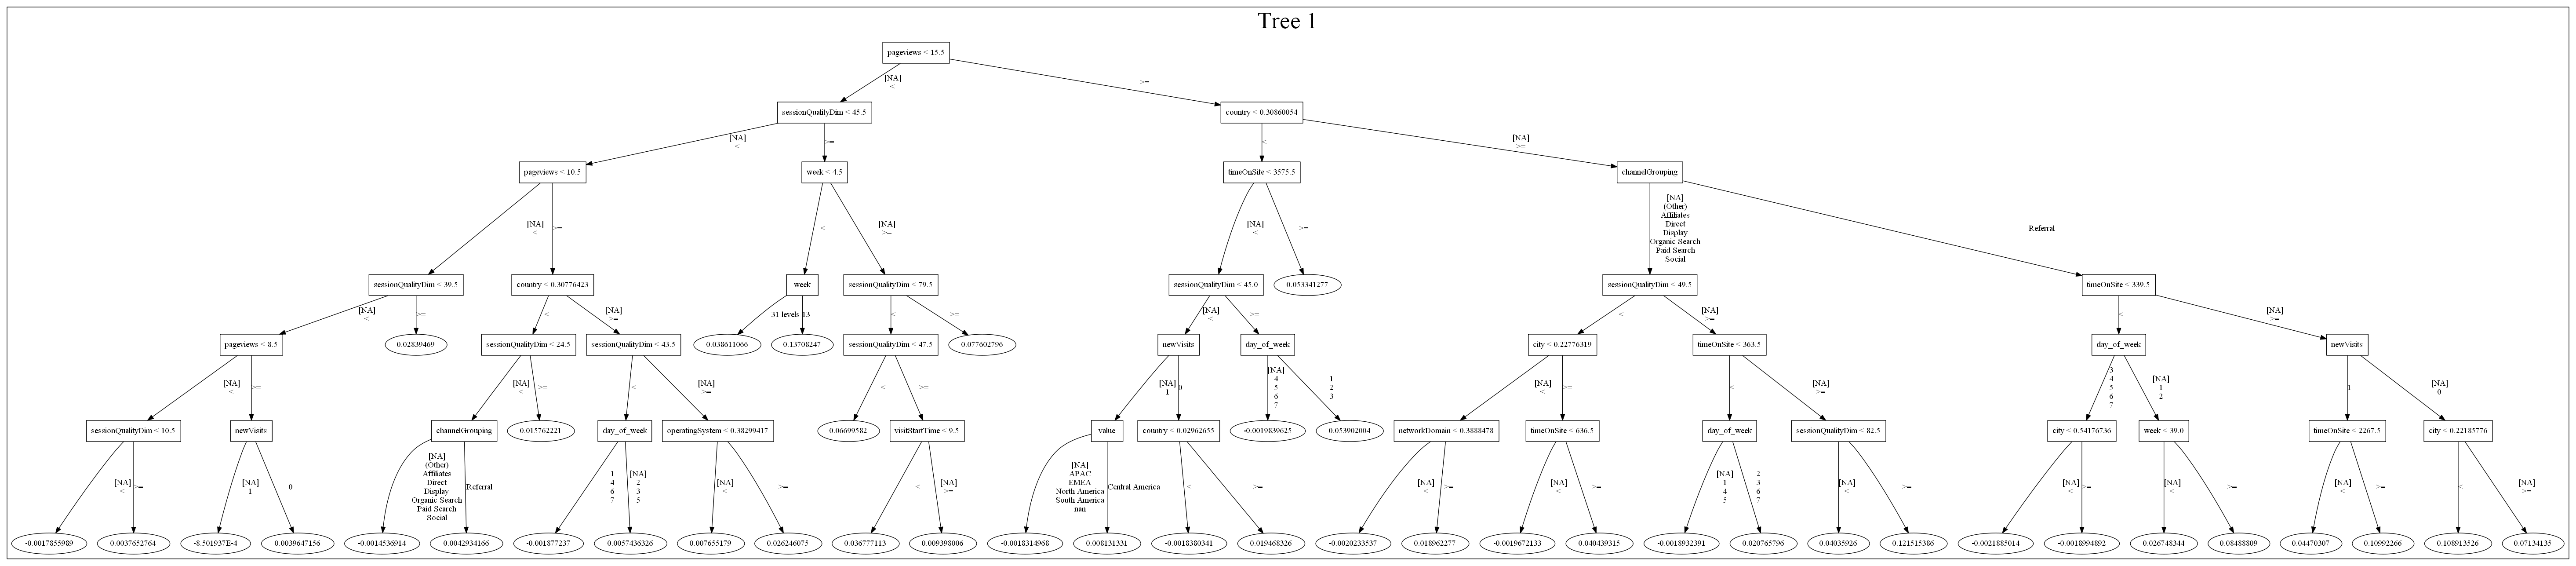

In [95]:
Image(filename=path+image_file_path+'_1.png')